In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Load your CSV file
# df = pd.read_csv()
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Load your CSV file
df = pd.read_csv("your_file.csv", parse_dates=True, index_col=0)

# Ensure the time series index is sorted
df = df.sort_index()

# Limit the dataset to the last 30 days (or fewer for faster testing)
df = df.tail(30)

# Decompose the time series with a smaller period (e.g., 12-hour seasonality)
decomposition = seasonal_decompose(df['value'], model='additive', period=12)
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

# Drop missing values created by decomposition
df = df.dropna()

# Split into train and test
train = df.iloc[:-1]  # all but the last row
test = df.iloc[-1:]   # last row for prediction

# Train the SARIMA model with simpler parameters for quicker fitting
model = SARIMAX(train['value'], 
                order=(1, 0, 1),       # (p, d, q) parameters
                seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) for 12-hour seasonality
                trend='c',            # constant term
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)

# Forecast the test period
forecast = sarima_model.forecast(steps=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['value'], label='Train', color='blue')
plt.scatter(test.index, test['value'], label='Actual', color='red')
plt.scatter(test.index, forecast, label='Forecast', color='green')
plt.axvline(x=test.index[0], linestyle='--', color='gray', label='Test Start')
plt.title('SARIMA Prediction vs Actual')
plt.legend()
plt.show()

# Print metrics
mse = mean_squared_error(test['value'], forecast)
print(f"Mean Squared Error: {mse}")
", parse_dates=True, index_col=0)

# Ensure the time series index is sorted
df = df.sort_index()

# Limit the dataset to the last 30 days (or fewer for faster testing)
df = df.tail(30)

# Decompose the time series with a smaller period (e.g., 12-hour seasonality)
decomposition = seasonal_decompose(df['kWh'], model='additive', period=12)
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

# Drop missing kWhs created by decomposition
df = df.dropna()

# Split into train and test
train = df.iloc[:-1]  # all but the last row
test = df.iloc[-1:]   # last row for prediction

# Train the SARIMA model with simpler parameters for quicker fitting
model = SARIMAX(train['kWh'], 
                order=(1, 0, 1),       # (p, d, q) parameters
                seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) for 12-hour seasonality
                trend='c',            # constant term
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)

# Forecast the test period
forecast = sarima_model.forecast(steps=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['kWh'], label='Train', color='blue')
plt.scatter(test.index, test['kWh'], label='Actual', color='red')
plt.scatter(test.index, forecast, label='Forecast', color='green')
plt.axvline(x=test.index[0], linestyle='--', color='gray', label='Test Start')
plt.title('SARIMA Prediction vs Actual')
plt.legend()
plt.show()

# Print metrics
mse = mean_squared_error(test['kWh'], forecast)
print(f"Mean Squared Error: {mse}")

ValueError: zero-size array to reduction operation maximum which has no identity

 99%|█████████▉| 1620/1630 [03:42<00:02,  3.90it/s]

Best SARIMA Parameters: (1, 0, 0, 1, 0, 1, 12)
Best Mean Squared Error: 2194.5737223198935


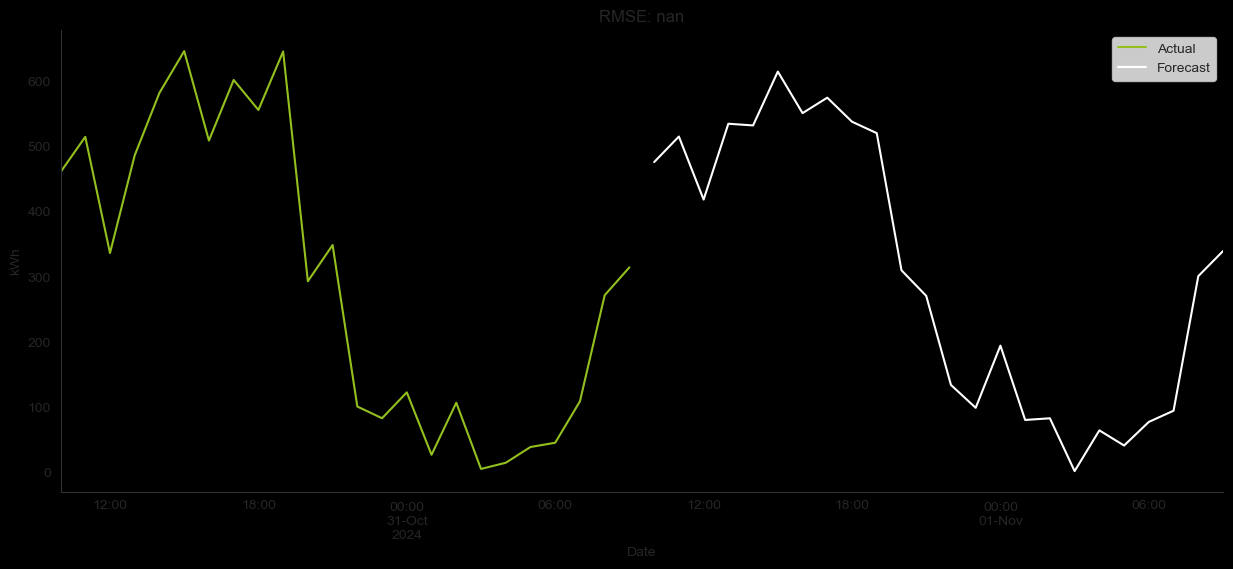

100%|██████████| 1630/1630 [03:42<00:00,  7.32it/s]
